Importando as bibliotecas


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Passengerird: Identificador único para cada passageiro;

Survived: Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)

Pclass: Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;

Name: Nome do passageiro;

Sex: Sexo do passageiro;

Age: Idade do passageiro;

SibSp: Número de irmãos - esposas a bordo;

Parch: Numero de pais-filhos a bordo;
Ticket: Número da passagem;

Fare: Preço da passagem;

Cabin: Cabine;

Embarked: Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)

In [11]:
train_data = pd.read_csv('train.csv')

***Análise Exploratória e Visualização de Dados:***

1. Explore a distribuição de características-chave, como idade, sexo,
classe socioeconômica e taxa de sobrevivência.

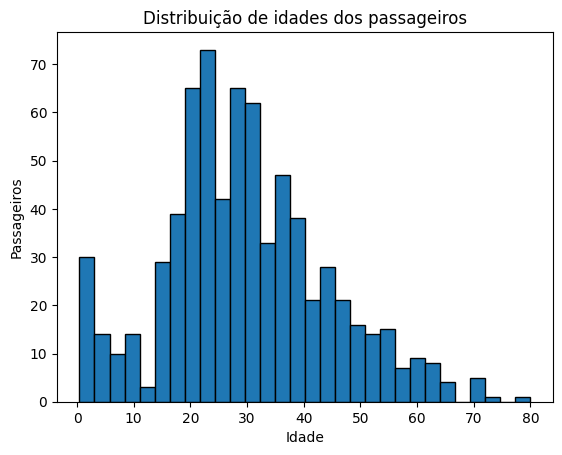

In [13]:
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Idade')
plt.ylabel('Passageiros')
plt.title('Distribuição de idades dos passageiros')
plt.show()

*A maior taxa de pessoas variam entre 20 e 30 anos de idade*

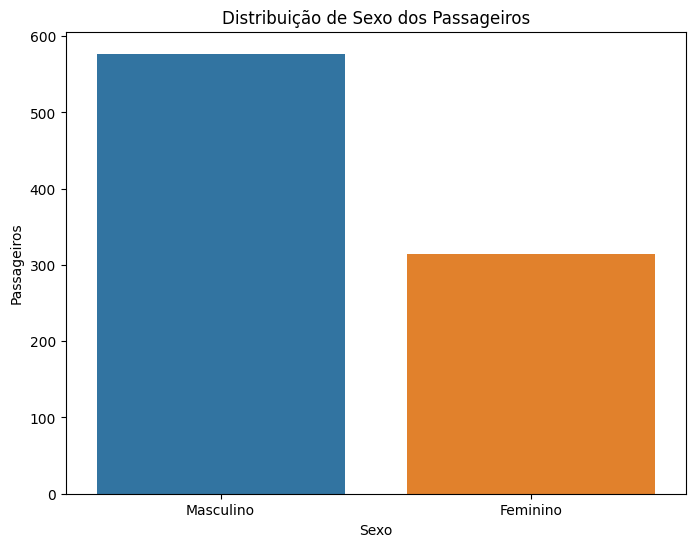

In [16]:
plt.figure(figsize=(8, 6))
train_data['Sex'] = train_data['Sex'].replace({'female': 'Feminino', 'male': 'Masculino'})
sns.countplot(data=train_data, x='Sex')
plt.title('Distribuição de Sexo dos Passageiros')
plt.xlabel('Sexo')
plt.ylabel('Passageiros')
plt.show()

*Percebe-se que o número de pessoas do sexo masculino é maior do que feminino*

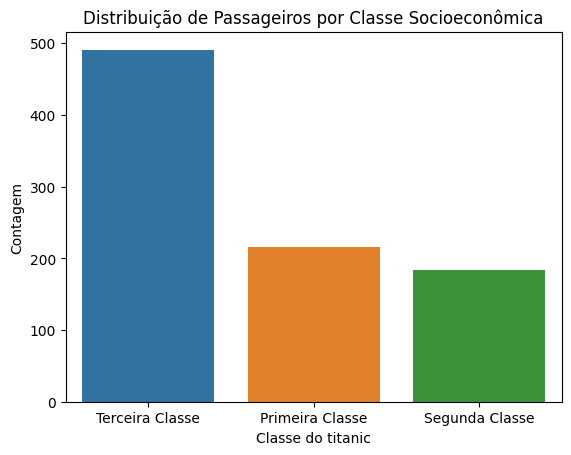

In [17]:
counts = train_data['Pclass'].value_counts()
labels = {1: 'Primeira Classe', 2: 'Segunda Classe', 3: 'Terceira Classe'}
sns.barplot(x=counts.index.map(labels), y=counts)
plt.xlabel('Classe do titanic')
plt.ylabel('Contagem')
plt.title('Distribuição de Passageiros por Classe Socioeconômica')
plt.show()

*Pode-se analisar que o número de passageiros da terceira clase é maior que o da segunda e primeira juntos*

<ipython-input-20-ee1dee1f1088>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


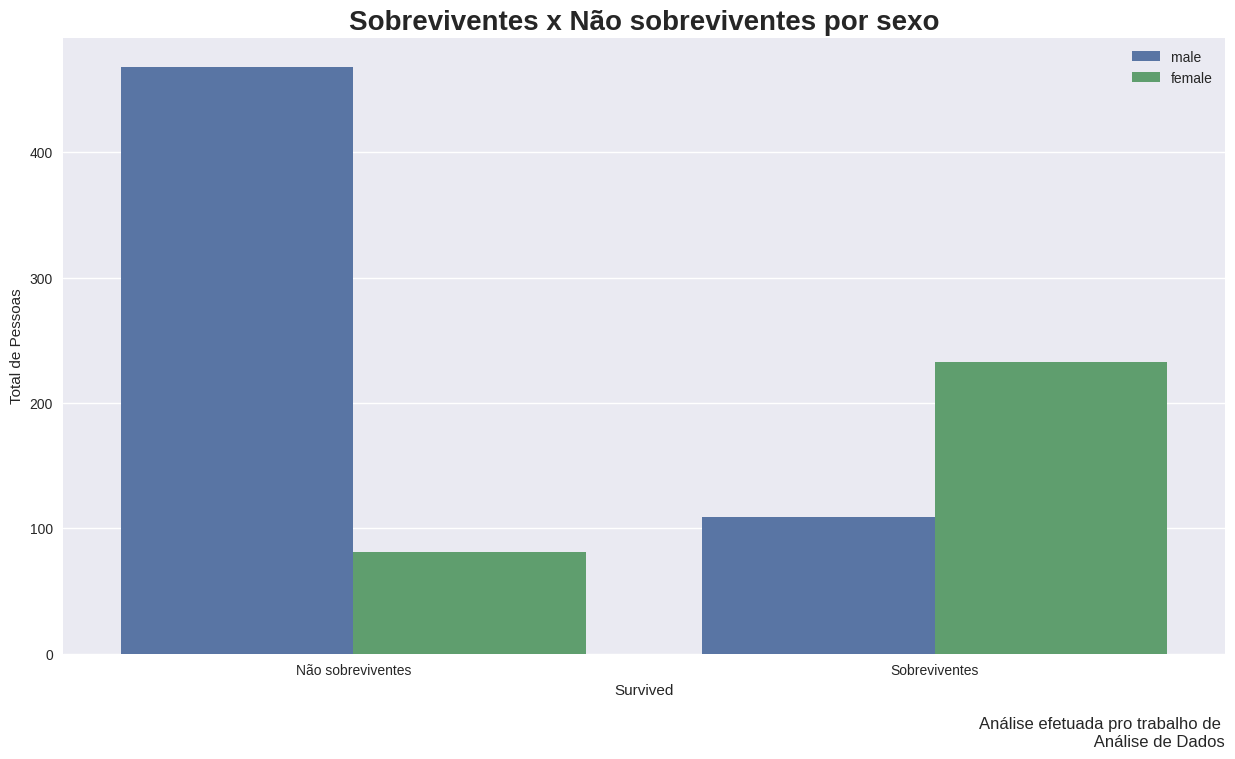

In [20]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")

g = sns.countplot(x='Survived', hue='Sex', data=train)
plt.legend(loc='upper right')
g.set(ylabel="Total de Pessoas", xticklabels=["Não sobreviventes", "Sobreviventes"])
plt.savefig('sobreviventes_por_sexo.png')
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)
plt.show()

*Percebesse que a maior parte dos mortos, eram do sexo masculino. Onde a frase "Mulheres e crianças primeiro" consta a realidade abordada*

<ipython-input-22-f24c275ed271>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


Text(1, -0.15, 'Análise efetuada pro trabalho de \n Análise de Dados')

<Figure size 1800x1000 with 0 Axes>

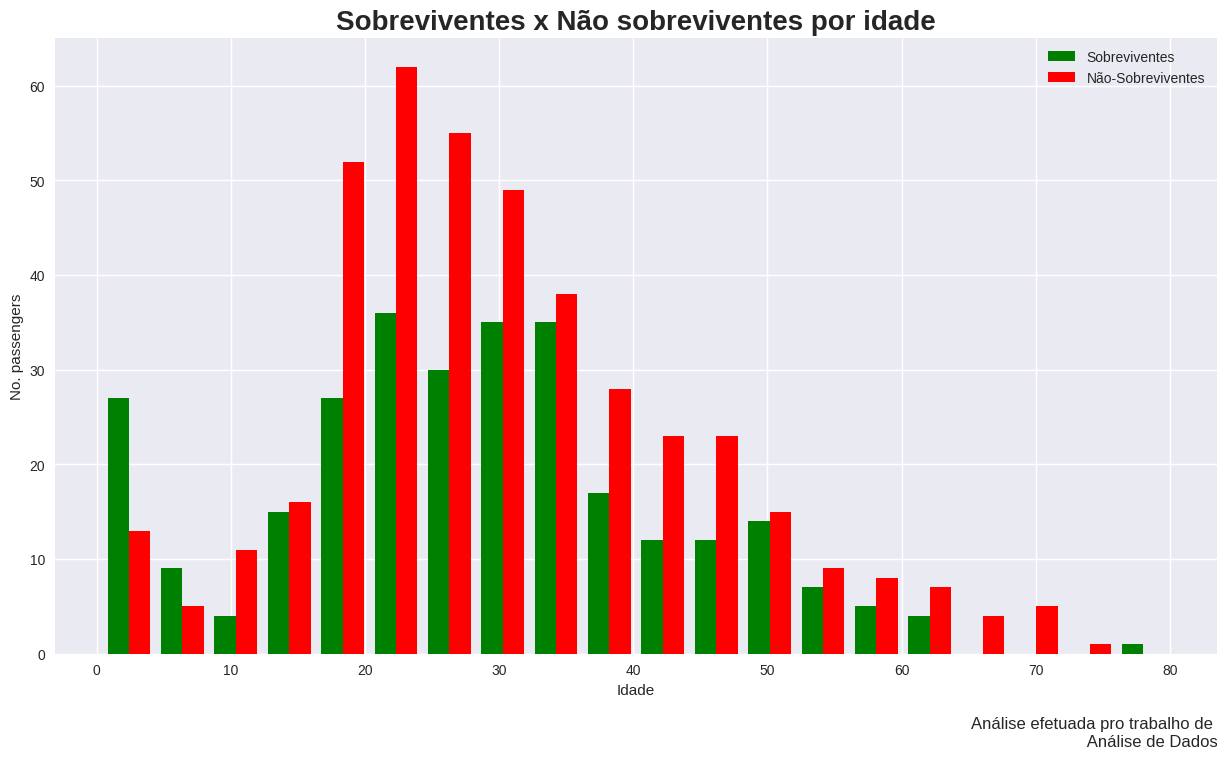

In [22]:
plt.figure( figsize=(18, 10) )

plt.style.use('seaborn')

figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']],
         stacked=False, color=['g','r'],
         bins=20, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.savefig('idade_sobreviventes.png')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend();
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

*Pode perceber que as pessoas acima de 60 anos a taxa de sobrevivencia foi a maior taxa de não sobreviventes, e que mais sobreviveram ao desastre foi entre a faixa dos 20 aos 40 anos.*

*2. Identifique padrões ou correlações entre as características e a sobrevivência dos passageiros.*

In [24]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['Survived'])
contingency_table.rename({0: 'Mortes', 1: 'Sobreviventes'}, axis=1, inplace=True)
print(contingency_table)


Survived   Mortes  Sobreviventes
Sex                             
Feminino       81            233
Masculino     468            109


*3. Visualize esses padrões por meio de gráficos de barras, histogramas, gráficos de dispersão ou boxplots.*

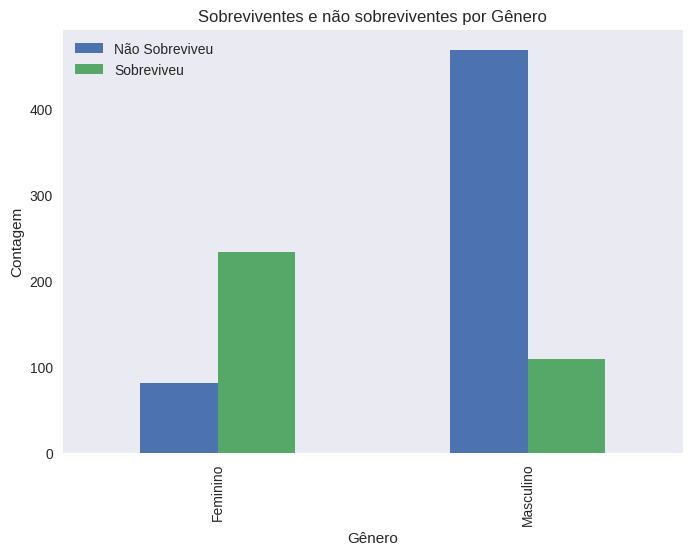

In [28]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['Survived'])
contingency_table = contingency_table[[0, 1]]
contingency_table.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Sobreviventes e não sobreviventes por Gênero')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()


4. *Investigue se existem diferenças na taxa de sobrevivência entre grupos, como homens e mulheres, ou diferentes classes de passageiros.*

<ipython-input-29-3e6cb3d5c324>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


<Axes: title={'center': 'Grupos mais chances de sobrevivência'}, xlabel='Embarked', ylabel='Survived'>

<Figure size 1500x800 with 0 Axes>

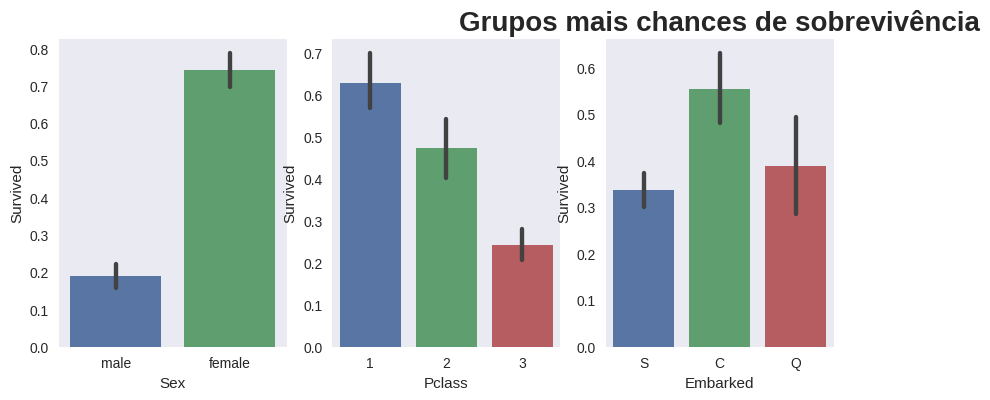

In [29]:
plt.figure( figsize=(15, 8) )

plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))
plt.title('Grupos mais chances de sobrevivência', fontsize=20, fontweight='bold')
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

Pelo gráfico acima já conseguimos confirmar duas suposições:

Sex

*  75% de mulheres sobreviveram
*  19% de homens sobreviveram

Pclass
*  As pessoas de 1° classe tem mais 60% de chance de sobreviverem
*  As pessoas de 2° classe tem quase 50% de chance de sobreviverem
*  As pessoas de 3° classe tem pouco mais de 20% de chance de sobreviverem

Embarked

* As pessoas que embarcaram em Southampton tem 34% de chance de sobreviverem
* As pessoas que embarcaram em Cherbourg tem 55% de chance de sobreviverem
* As pessoas que embarcaram em Queenstown tem 39% de chance de sobreviverem


***Medidas de Tendência Central e Medidas de Dispersão:***

 1. Calcule a média de idades dos passageiros e identifique possíveis diferenças entre os grupos de sobreviventes e não sobreviventes.





In [31]:
media_idades_total = train_data['Age'].mean()
print("Média de idades para todos os passageiros:", media_idades_total)
sobreviventes = train_data[train_data['Survived'] == 1]
nao_sobreviventes = train_data[train_data['Survived'] == 0]
media_idades_sobreviventes = sobreviventes['Age'].mean()
print("Média de idades para sobreviventes:", media_idades_sobreviventes)
media_idades_nao_sobreviventes = nao_sobreviventes['Age'].mean()
print("Média de idades para não sobreviventes:", media_idades_nao_sobreviventes)

Média de idades para todos os passageiros: 29.69911764705882
Média de idades para sobreviventes: 28.343689655172415
Média de idades para não sobreviventes: 30.62617924528302


*A média da idade dos não sobreviventes é maior que as do sobreviventes, supondo então que a idade de não sobrevimentes é maior do que as dos sobreviventes, assim resulta numa média maior*

2. Determine a variação da tarifa paga pelos passageiros e compare-a entre grupos.

In [32]:
sobreviventes = train_data[train_data['Survived'] == 1]
nao_sobreviventes = train_data[train_data['Survived'] == 0]
variacao_tarifa_sobreviventes = sobreviventes['Fare'].max() - sobreviventes['Fare'].min()
print("Variação da tarifa para sobreviventes:", variacao_tarifa_sobreviventes)
variacao_tarifa_nao_sobreviventes = nao_sobreviventes['Fare'].max() - nao_sobreviventes['Fare'].min()
print("Variação da tarifa para não sobreviventes:", variacao_tarifa_nao_sobreviventes)

Variação da tarifa para sobreviventes: 512.3292
Variação da tarifa para não sobreviventes: 263.0


<ipython-input-33-430ac52f4876>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


Text(1, -0.15, 'Análise efetuada pro trabalho de \n Análise de Dados')

<Figure size 2000x800 with 0 Axes>

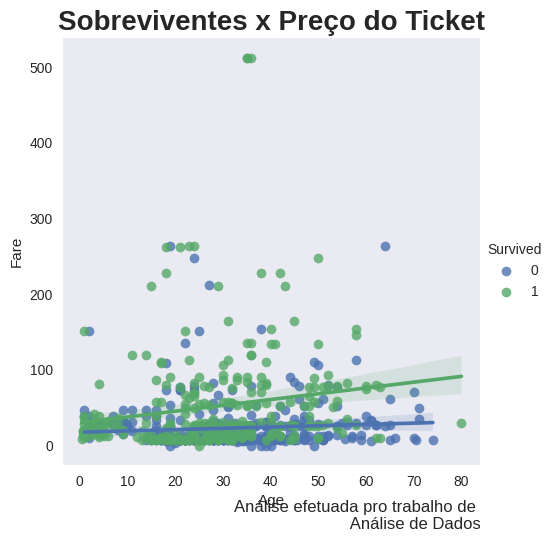

In [33]:
plt.figure(figsize=(20, 8))
plt.style.use('seaborn-dark')
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')
plt.title('Sobreviventes x Preço do Ticket', fontsize=20, fontweight='bold')
plt.savefig('sobreviventes_preco_ticket.png')
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

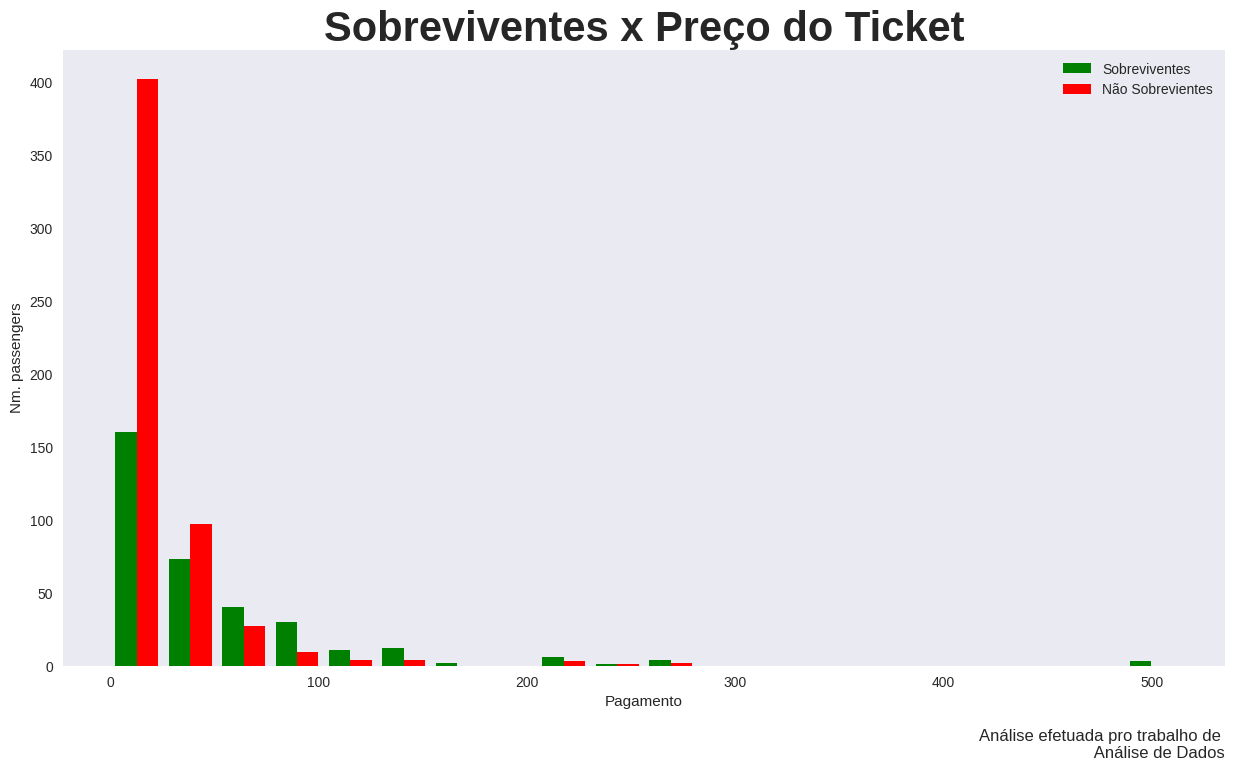

In [34]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']],
         stacked=False, color=['g','r'],
         bins=20, label=['Sobreviventes','Não Sobrevientes'])
plt.xlabel('Pagamento')
plt.ylabel('Nm. passengers')
plt.savefig('sobreviventes_preco_ticket3.png')

plt.title('Sobreviventes x Preço do Ticket', fontsize=30, fontweight='bold')

plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

plt.legend();

A maior parte dos tickets foram comprados pelo um valor bem abaixo dos 100 e muitos dos passageiros são da faixa de 40 a 10 anos.

* 3.Calcule a porcentagem de sobreviventes em cada classe socioeconômica e explore as diferenças entre elas.*

In [36]:
sobreviventes_por_classe = train_data.groupby('Pclass')['Survived'].sum()
total_por_classe = train_data['Pclass'].value_counts()
porcentagem_sobreviventes = (sobreviventes_por_classe / total_por_classe) * 100
print("Porcentagem de sobreviventes por classe socioeconômica:")
print(porcentagem_sobreviventes)

Porcentagem de sobreviventes por classe socioeconômica:
1    62.962963
2    47.282609
3    24.236253
dtype: float64


**Amostragem e Probabilidade:**

* 1. Realize amostragem aleatória para criar conjuntos de treinamento e teste para avaliar o desempenho do modelo de machine learning.


In [39]:
survival_prob_by_gender = train.groupby('Sex')['Survived'].mean()
survival_prob_by_class = train.groupby('Pclass')['Survived'].mean()
print("Probabilidade de sobrevivência por gênero:")
print(survival_prob_by_gender)
print("\nProbabilidade de sobrevivência por classe:")
print(survival_prob_by_class)

Probabilidade de sobrevivência por gênero:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Probabilidade de sobrevivência por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


*Hipoteticamente mulheres da 1º classe teriam mais chance de sobreviver*

 2. Calcule a probabilidade de sobrevivência com base em diferentes características, como gênero ou classe, e compare-as.

In [41]:
survival_prob_by_gender = train.groupby('Sex')['Survived'].mean()
survival_prob_by_class = train.groupby('Pclass')['Survived'].mean()
survival_prob_by_age = train.groupby('Age')['Survived'].mean()


In [42]:
print("Probabilidade de sobrevivência por gênero:")
print(survival_prob_by_gender)
print("\nProbabilidade de sobrevivência por classe:")
print(survival_prob_by_class)
print("\nProbabilidade de sobrevivência por idade:")
print(survival_prob_by_age)

Probabilidade de sobrevivência por gênero:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Probabilidade de sobrevivência por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Probabilidade de sobrevivência por idade:
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


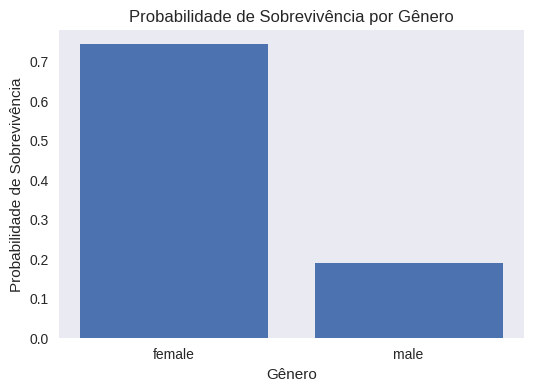

In [43]:
plt.figure(figsize=(6, 4))
plt.bar(survival_prob_by_gender.index, survival_prob_by_gender.values)
plt.title('Probabilidade de Sobrevivência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Probabilidade de Sobrevivência')
plt.show()

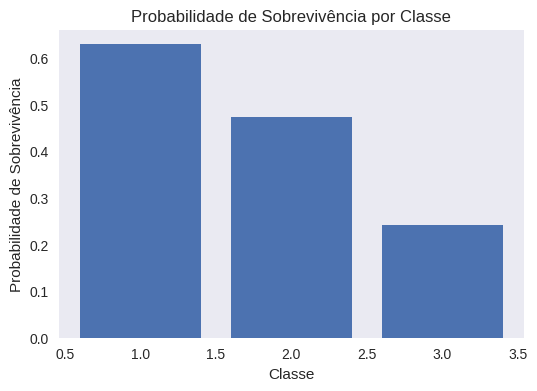

In [44]:
plt.figure(figsize=(6, 4))
plt.bar(survival_prob_by_class.index, survival_prob_by_class.values)
plt.title('Probabilidade de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Probabilidade de Sobrevivência')
plt.show()

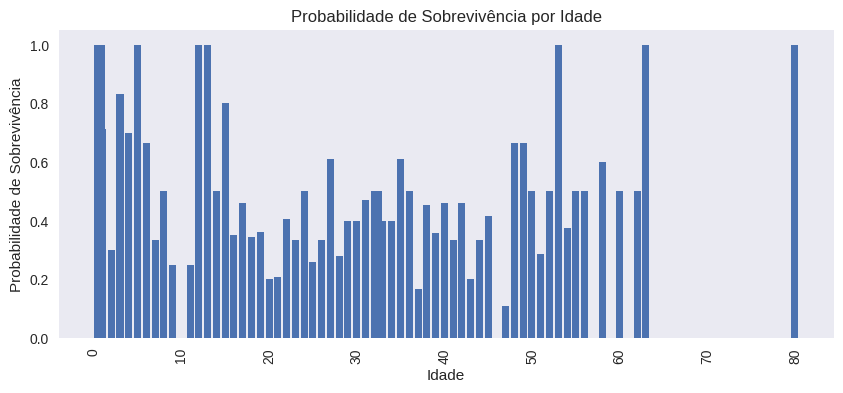

In [45]:
plt.figure(figsize=(10, 4))
plt.bar(survival_prob_by_age.index, survival_prob_by_age.values)
plt.title('Probabilidade de Sobrevivência por Idade')
plt.xlabel('Idade')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xticks(rotation=90)
plt.show()

*Através dos gráficos é possivel fazer uma suposição de que mulheres e crianças de 1º classe tiveram grande proporção em sobreviver*

**Regressão Linear:**

1. Aplique regressão linear para prever a taxa de sobrevivência com base em características relevantes.

In [48]:
X = train_data[['Age', 'Fare', 'Pclass']]
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

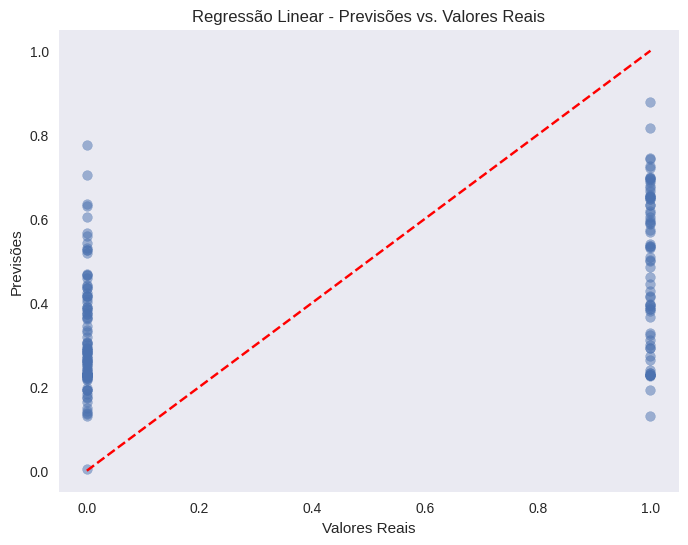

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Regressão Linear - Previsões vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

2. Avalie a importância de cada variável independente no modelo de regressão linear.

In [54]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
regressor = sm.OLS(y_train, X_train)
model = regressor.fit()
results = model.summary()
print(results)







                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     37.01
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           3.15e-22
Time:                        19:06:30   Log-Likelihood:                -442.45
No. Observations:                 712   AIC:                             892.9
Df Residuals:                     708   BIC:                             911.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9924      0.092     10.834      0.0

In [56]:
count = 0
for i in train.index:

    if pd.isnull(train['Age'][i]):

        if train['Pclass'][i] == 1:
            train['Age'][i] = round(train[train['Pclass'] == 1]['Age'].mean(), 0)

        elif train['Pclass'][i] == 2:
            train['Age'][i] = round(train[train['Pclass'] == 2]['Age'].mean(), 0)

        elif train['Pclass'][i] == 3:
            train['Age'][i] = round(train[train['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

<ipython-input-56-b09b46152cc5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-56-b09b46152cc5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-56-b09b46152cc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Idades nulas preenchidas pela média da idade dada pela classe que ela pertencia

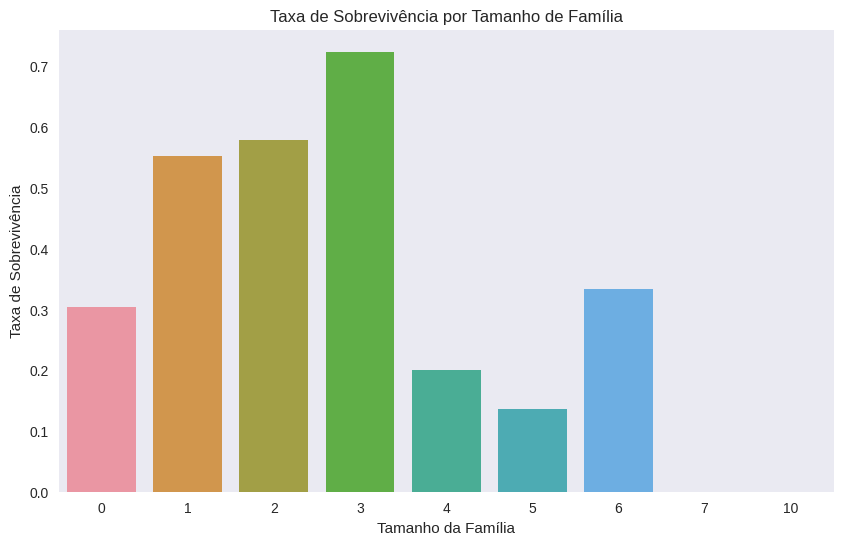

In [63]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

# Calcular a taxa de sobrevivência por tamanho de família
family_survival = train_data.groupby('FamilySize')['Survived'].mean().reset_index()

# Gráfico de barras para visualizar a taxa de sobrevivência por tamanho de família
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival)
plt.title('Taxa de Sobrevivência por Tamanho de Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

**Machine Learning:**

1. Implemente algoritmos de classificação, como árvores de decisão e radom forest, para prever a sobrevivência dos passageiros.
2. Realize a validação cruzada para avaliar o desempenho do modelo e ajustar os hiperparâmetros adequados.
3. Compare diferentes algoritmos e técnicas de machine learning em termos de precisão, recall ou outras métricas relevantes.

Faça suas considerações finais, destacando as inferências que puderam ser feitas com a análise.
Crie um dataframe com 2 colunas (Passageiro e Sobreviveu), para cada passageiro no conjunto de testes, você deve prever um valor 0 ou 1 (0 - morreu, 1 - sobreviveu).

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


train_data = pd.read_csv('train.csv')


relevant_features = ['Age', 'Fare', 'Pclass']
X_train = train_data[relevant_features]
y_train = train_data['Survived']


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)


test_data = pd.read_csv('test.csv')


X_test = test_data[relevant_features]


X_test_imputed = imputer.transform(X_test)


predictions = model.predict(X_test_imputed)


passenger_ids = test_data['PassengerId']
df_predictions = pd.DataFrame({'Passageiro': passenger_ids, 'Sobreviveu': predictions})


print(df_predictions)


     Passageiro  Sobreviveu
0           892           0
1           893           0
2           894           1
3           895           1
4           896           0
..          ...         ...
413        1305           0
414        1306           1
415        1307           0
416        1308           0
417        1309           1

[418 rows x 2 columns]


Considerações finais:
Segundo o que foi estudado e analisado sobre o Titanic podemos concluir que: A grande diferença em que foi tratado as classes que foi abordo ao Titanic é de longe absurdo, a primeria classe sem a menor dúvida teve acesso a salvar suas vidas enquanto pessoas da terceira classe nem a metade sobreviveu. Isso é, dentre o total de mulheres e crianças que foi a maior taxa de sobreviventes, primeria e segunda classe quase ninguém morreu. As diferenças com relação ao gênero foram marcantes, já que os homens da primeira classe tiveram uma taxa de mortalidade mais elevada do que as mulheres da terceira classe. Os homens apresentaram a maior taxa de mortalidade pois a prioridade desde de o começo foi mulheres e crianças.